#Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Taking the input

In [2]:
data = "SCIP.csv"
station_name = data[0:4]
dependent_variable = "temperature"
#dependent_variable = "precipitation"
#dependent_variable = "humidity"

# Importing the dataset

In [3]:
df = pd.read_csv(data)


#Dropping unwanted features in the dataset

In [4]:
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df.drop(['station', 'time', 'a'], axis=1, inplace=True)
df.dropna(inplace=True, axis=1, how='all')
df.dropna(how='all', axis=1, inplace=True)

# Taking care of missing data

In [5]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
idf = pd.DataFrame(imputer.fit_transform(df))
idf.columns = df.columns
idf.index = df.index

#Seperating the dependent and indepent variable(s) in the dataset

In [6]:
#y is the dependent variable
#x is the independent variable

if dependent_variable == "temperature":
  x = idf[idf.columns.drop('temp_2m_avg [degF]')]
  y = idf['temp_2m_avg [degF]']                       

elif dependent_variable == "humidity":
  x = idf[idf.columns.drop('relative_humidity_avg [percent]')]
  y = idf['relative_humidity_avg [percent]']

elif dependent_variable == "precipitation":
  x = idf[idf.columns.drop('precip_total [inch]')]
  y = idf['precip_total [inch]'] 

# Splitting the dataset into Training set and test set

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

# Training the model on training set

In [8]:
regressor = RandomForestRegressor(n_estimators = 50)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

# Predicting the test set result

In [9]:
y_pred = regressor.predict(x_test)
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':abs(y_test-y_pred)})
pd.options.display.float_format = "{:,.2f}".format

#Evaluating the performance of the model

In [10]:
#compute R2 and MSE
r2_score = r2_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)

#Print R2 and MSE values
print(f"Accuracy is: {r2_score * 100}")
print(f"mean_squared_error is: {mean_squared_error}")

Accuracy is: 99.15024885451827
mean_squared_error is: 2.7723831890869137


#Visualizing the training result

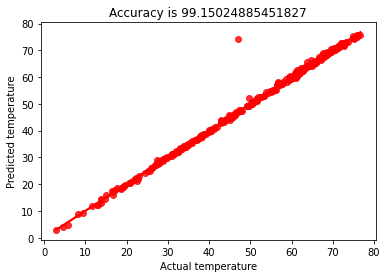

In [11]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title(f"")
plt.xlabel(f"Actual {dependent_variable}")
plt.ylabel(f"Predicted {dependent_variable}")
plt.title(f"Accuracy is {r2_score * 100}")
plt.savefig(f'{station_name}_{dependent_variable}.png')